In [1]:
import pandas as pd
import scipy as sc
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 7]
import warnings
warnings.filterwarnings('ignore')
import math
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [6]:
factors_number = 3
data_size = 20
factors = np.random.uniform(-10,10, size=(data_size, factors_number))  # generate factor values
my_data = [1 + 3*factors[i][0] - 2*factors[i][1] + factors[i][2] + np.random.normal(0, 1) for i in range(data_size)]
factors

array([[ 2.14553912e+00,  9.47974453e+00,  5.69652473e+00],
       [-3.21906962e+00,  7.96635880e+00,  5.56916353e+00],
       [-6.02186705e+00, -6.16152441e+00,  4.46458805e+00],
       [-8.37462109e+00, -2.54056752e+00,  4.08081215e+00],
       [ 4.86150251e+00, -3.75562308e+00, -3.86578699e-03],
       [-5.44396562e+00, -7.23965929e+00,  8.13186769e-01],
       [-9.03305289e+00,  5.04067506e+00, -8.17570068e+00],
       [-1.14488097e+00,  7.20323433e+00, -8.41388000e+00],
       [ 9.96336942e+00,  2.21445629e+00,  9.77454453e+00],
       [-7.90861705e+00, -8.87262914e+00,  4.39616361e+00],
       [ 7.00045781e+00, -4.58525420e+00,  6.27857045e+00],
       [ 1.08022807e+00,  7.39041472e+00, -3.06230792e+00],
       [ 7.47654707e+00,  1.74310004e+00,  7.40122800e+00],
       [ 5.65400378e+00, -7.70865358e+00, -2.80492449e+00],
       [-9.92029928e+00,  6.58472931e+00,  4.78689864e+00],
       [-6.21913606e-01,  7.96293389e+00, -5.25012697e+00],
       [-7.06818559e-01, -9.33350698e+00

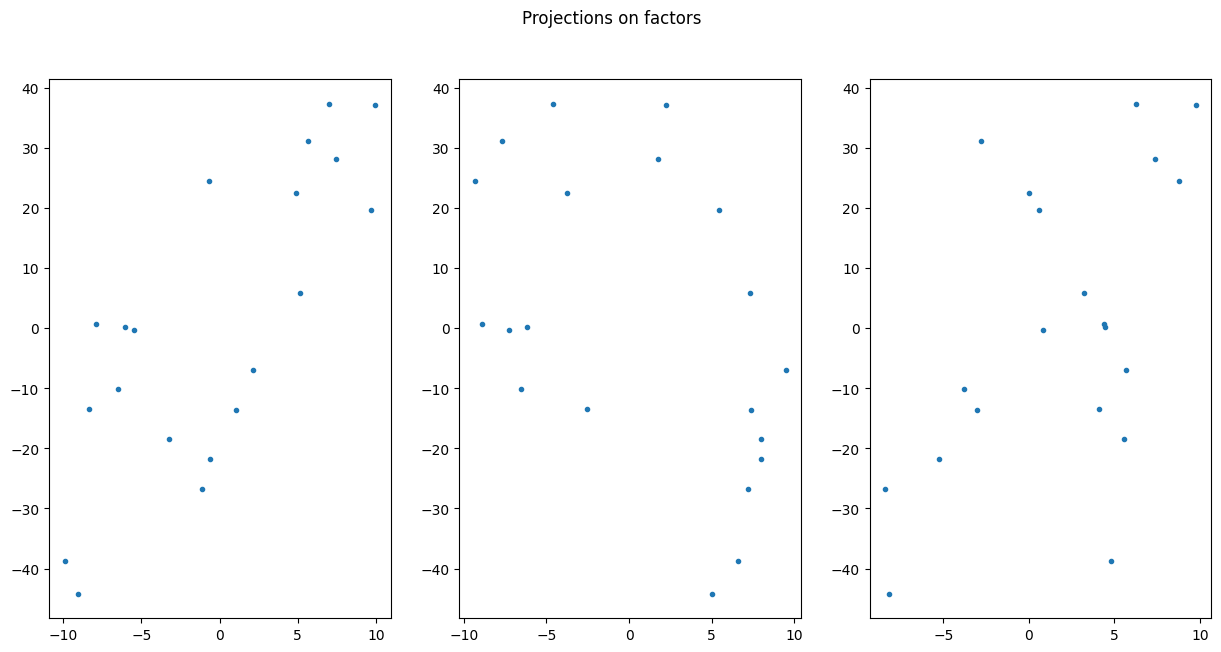

In [7]:
fig, axs = plt.subplots(1, 3)
fig.suptitle('Projections on factors')
axs[0].plot(factors[:,0], my_data, '.')
axs[1].plot(factors[:,1], my_data, '.')
axs[2].plot(factors[:,2], my_data, '.')

In [8]:
model = LinearRegression()
model.fit(pd.DataFrame(factors), my_data)
print("b0: ", model.intercept_)
print("b_: ", model.coef_)
print("correct values: 1, 3, -2, 1")

b0:  0.9400776376329829
b_:  [ 3.01331653 -2.01555062  1.01986423]
correct values: 1, 3, -2, 1


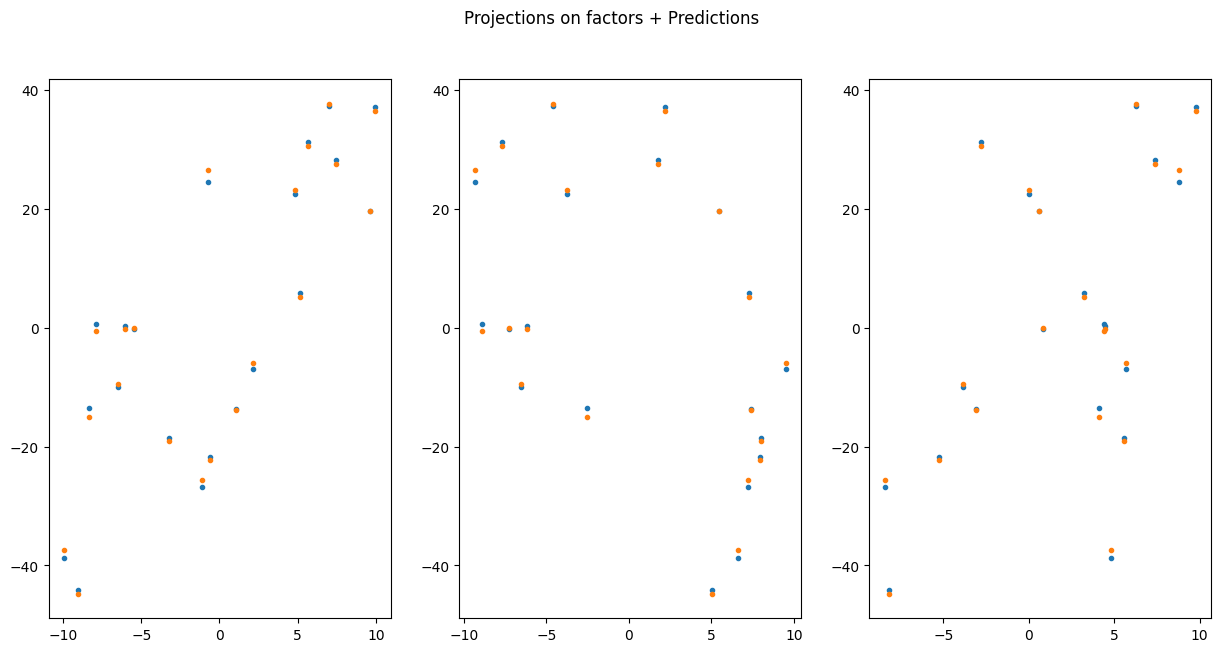

In [9]:
fig, axs = plt.subplots(1, 3)
fig.suptitle('Projections on factors + Predictions')
axs[0].plot(factors[:,0], my_data, '.')
axs[0].plot(factors[:,0], model.predict(factors), '.')
axs[1].plot(factors[:,1], my_data, '.')
axs[1].plot(factors[:,1], model.predict(factors), '.')
axs[2].plot(factors[:,2], my_data, '.')
axs[2].plot(factors[:,2], model.predict(factors), '.')

In [10]:
RSS = sum([(model.predict(factors[i].reshape(1, -1)) - my_data[i])**2 for i in range(data_size)])
RSE = (RSS / (data_size - factors_number - 1)) ** 0.5
print("RSS: ", RSS[0], "\nRSE: ", RSE[0])

RSS:  17.133882566204402 
RSE:  1.0348273577692924


In [11]:
factors = pd.DataFrame(factors)
corr = factors.corr(method='pearson')
corr

,0,1,2
0,1.000000,0.154239,0.239661
1,0.154239,1.000000,-0.202652
2,0.239661,-0.202652,1.000000


In [27]:
df = pd.read_csv('Global_annual_mean_temp.csv',low_memory=False)
df = df.drop_duplicates()
# plt.plot(df['Year'], df['No_Smoothing'])

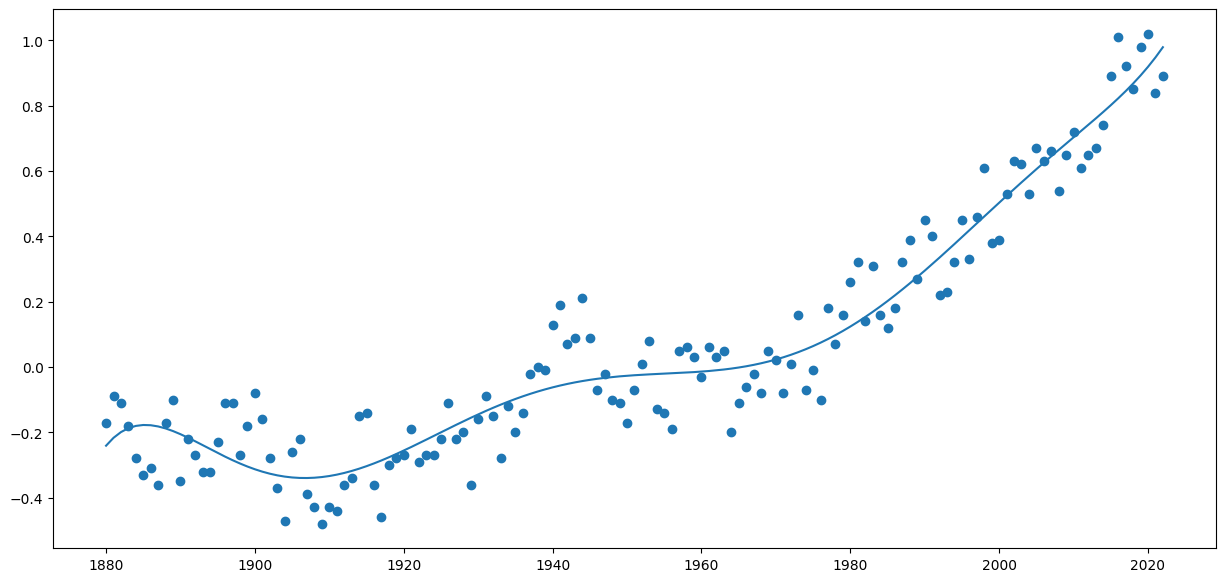

poly1d([ 5.43688819e-24, -4.88272828e-20,  1.36321178e-16, -1.29036482e-14,
       -4.47903849e-10, -1.13787042e-08,  1.72138387e-03,  2.72048155e-01,
       -7.79141433e+03,  1.05737709e+07, -4.48480613e+09])

In [28]:
model = np.poly1d(np.polyfit(df['Year'], df['No_Smoothing'], 10))
plt.scatter(df['Year'], df['No_Smoothing'])
plt.plot(df['Year'], model(df['Year']))
plt.show()
model

In [37]:
def select_extension(predictor, corrector, right_border):
    for i in range(right_border):
        m = np.poly1d(np.polyfit(predictor, corrector, i))
        rss = sum((m(predictor) - corrector)**2)
        print(f"RSS x^{i} ", rss)

select_extension(df['Year'], df['No_Smoothing'], 10)

RSS x^0  19.226493706293713
RSS x^1  4.519526292721364
RSS x^2  1.9563211875965778
RSS x^3  1.892105084859876
RSS x^4  1.7438309141636696
RSS x^5  1.6556419449575313
RSS x^6  1.5697925340514447
RSS x^7  1.571343342955056
RSS x^8  1.572886431044382
RSS x^9  1.4831248797679262


In [106]:
x = sc.stats.norm(loc=5, scale=3).rvs(10000)
print(sc.stats.kstest(x, 'norm', args=(x.mean(), x.std(ddof=1))))
print(x.mean())
print((x.std()))

KstestResult(statistic=0.005169190088497144, pvalue=0.950808443200472, statistic_location=7.548507964741606, statistic_sign=1)
5.010476986201314
2.9985244286976176


In [103]:
for i in range(100):
    buffer = 0
    x = sc.stats.norm(loc=0, scale=1).rvs(100000)
    if sc.stats.kstest(x, 'norm', args=(x.mean(), x.std(ddof=1))).pvalue > 0.95:
        buffer += 1
buffer

0

(array([1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 3.0000e+00, 2.0000e+00, 1.0000e+00, 3.0000e+00,
        0.0000e+00, 4.0000e+00, 3.0000e+00, 2.0000e+00, 5.0000e+00,
        2.0000e+00, 1.1000e+01, 6.0000e+00, 1.0000e+01, 1.4000e+01,
        1.3000e+01, 1.3000e+01, 2.6000e+01, 2.4000e+01, 3.4000e+01,
        4.0000e+01, 4.3000e+01, 6.3000e+01, 6.3000e+01, 8.6000e+01,
        1.0100e+02, 1.1000e+02, 1.5100e+02, 1.8500e+02, 1.8600e+02,
        2.2800e+02, 2.5800e+02, 2.9300e+02, 3.3700e+02, 3.9300e+02,
        4.7100e+02, 5.2100e+02, 5.7800e+02, 6.7800e+02, 7.9800e+02,
        8.7700e+02, 9.0500e+02, 1.1150e+03, 1.2630e+03, 1.3760e+03,
        1.6520e+03, 1.9250e+03, 1.9220e+03, 2.2260e+03, 2.4880e+03,
        2.7710e+03, 3.0710e+03, 3.2920e+03, 3.6540e+03, 3.9440e+03,
        4.3090e+03, 4.7740e+03, 5.2690e+03, 5.5970e+03, 6.0600e+03,
        6.7060e+03, 7.1110e+03, 7.6870e+03, 8.1660e+03, 9.0040e+03,
        9.3090e+03, 9.9510e+03, 1.0448e+04, 1.13

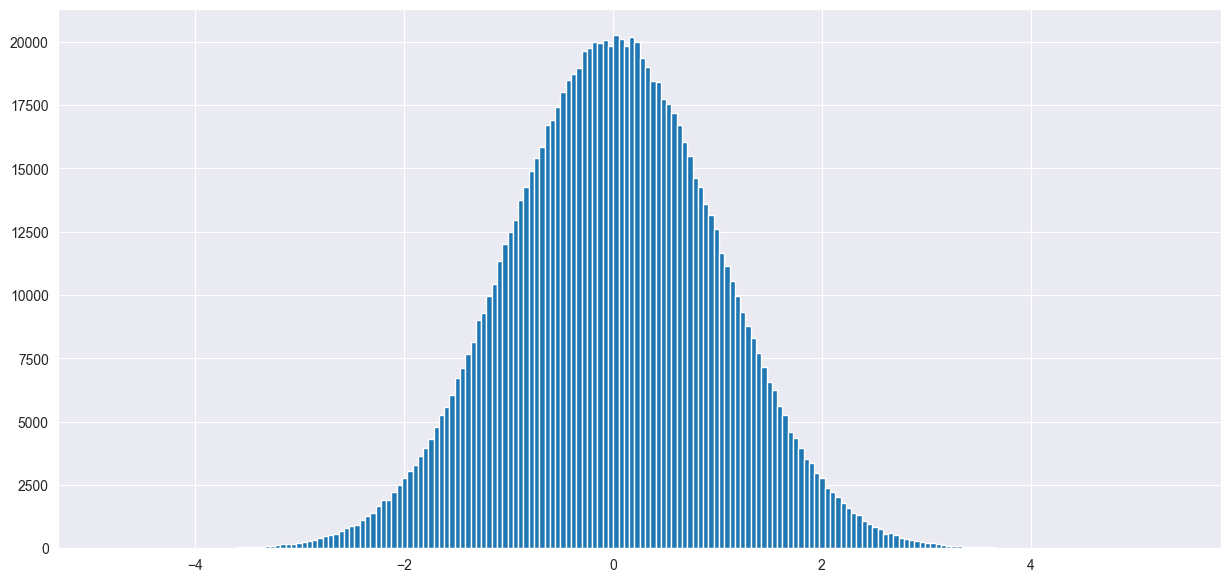

In [49]:
plt.hist(x, bins=200)